In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print("folder names: ")
print(check_output(["ls", "../input"]).decode("utf8"))

print("files (corruption-index): ")
print(check_output(["ls", "../input/corruption-index"]).decode("utf8"))

print("files (world-happiness): ")
print(check_output(["ls", "../input/world-happiness"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

folder names: 
corruption-index
world-happiness

files (corruption-index): 
history.csv
index.csv

files (world-happiness): 
2015.csv
2016.csv
2017.csv



In [2]:
import seaborn as sns 
import matplotlib as mpl 
import plotly.graph_objs as go 
from plotly.graph_objs import *
from matplotlib import pyplot as plt 
from plotly.offline import iplot, init_notebook_mode


sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
init_notebook_mode(connected=True)
%matplotlib inline 

In [3]:
df_15 = pd.read_csv('../input/world-happiness/2015.csv')
df_15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
print(df_15.dtypes)
print(df_15.shape)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
(158, 12)


In [5]:
df_15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


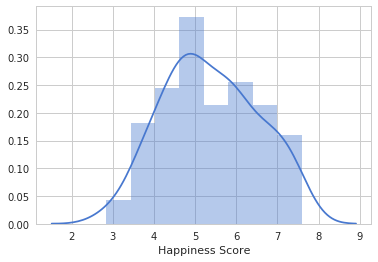

In [6]:
sns.distplot(df_15['Happiness Score'])

In [7]:
corrmat = df_15.corr() 
corrmat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


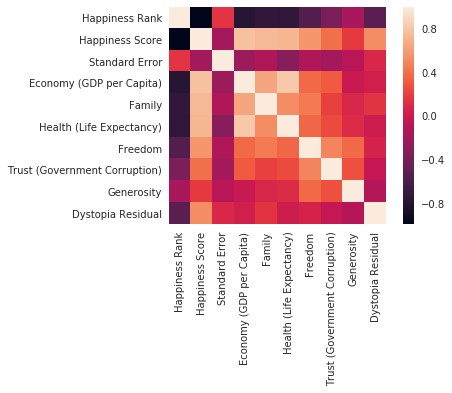

In [8]:
sns.heatmap(corrmat, square=True)

In [9]:
# choropleth map across all countries 
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = df_15['Country'],
    locationmode = 'country names',
    z = df_15['Happiness Score'],
    text = df_15['Country'],
    colorbar = {'title':'Happiness Score'}
)

layout = dict(
    title = 'Global Happiness Score',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = {'type':'Mercator'}
    )
)

cmap = go.Figure(data=[data], layout=layout)
iplot(cmap)

In [10]:
# let's look at regional level 
print(df_15.groupby('Region')['Happiness Rank'].nunique())
print("Total countries: {} countries".format(df_15.shape[0]))

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Happiness Rank, dtype: int64
Total countries: 158 countries


In [11]:
# let's look at Southeast Asia
# df_sea = df_15[df_15['Region']=='Southeastern Asia']
# print("Total countries in Southeastern Asia: {}".format(df_sea.shape[0]))
# print([country for country in df_sea['Country']])

In [12]:
# CPI: 100 (very clean) to 0 (highly corrupt)
corr_df = pd.read_csv('../input/corruption-index/index.csv')
corr_df.head()

,CPI Rank,Country,Country Code,Region,Corruption Perceptions Index (CPI),Standard Error,Lower Confidence Interval,Upper Confidence Interval,World Bank CPIA,World Economic Forum EOS,...,African Development Bank CPIA,IMD World Competitiveness Yearbook,Bertelsmann Foundation Sustainable Governance Index,World Justice Project Rule of Law Index,PRS International Country Risk Guide,Varities of Democracy Project,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,PERC Asia Risk Guide,Sources
0,1,New Zealand,NZL,Asia Pacific,90,2.56,86,94,NaN,90.0,...,NaN,95.0,99.0,79.0,93.0,NaN,90.0,NaN,NaN,7
1,1,Denmark,DNK,Europe and Central Asia,90,2.46,86,94,NaN,85.0,...,NaN,98.0,99.0,85.0,93.0,NaN,90.0,NaN,NaN,7
2,3,Finland,FIN,Europe and Central Asia,89,1.46,87,92,NaN,91.0,...,NaN,94.0,90.0,85.0,93.0,NaN,90.0,NaN,NaN,7
3,4,Sweden,SWE,Europe and Central Asia,88,1.33,85,90,NaN,86.0,...,NaN,86.0,90.0,85.0,93.0,NaN,90.0,NaN,NaN,7
4,5,Switzerland,CHE,Europe and Central Asia,86,1.57,83,89,NaN,80.0,...,NaN,88.0,90.0,NaN,85.0,NaN,90.0,NaN,NaN,6


In [13]:
print(corr_df.dtypes)
print(corr_df.shape)

CPI Rank                                                 int64
Country                                                 object
Country Code                                            object
Region                                                  object
Corruption Perceptions Index (CPI)                       int64
Standard Error                                         float64
Lower Confidence Interval                                int64
Upper Confidence Interval                                int64
World Bank CPIA                                        float64
World Economic Forum EOS                               float64
Global Insight Country Risk Ratings                      int64
Bertelsmann Foundation Transformation Index            float64
African Development Bank CPIA                          float64
IMD World Competitiveness Yearbook                     float64
Bertelsmann Foundation Sustainable Governance Index    float64
World Justice Project Rule of Law Index                

In [14]:
# filter based on the countries exists in df_sea 
# i1 = corr_df.set_index(['Country']).index
# i2 = df_sea.set_index(['Country']).index
# corr_country_df = corr_df[i1.isin(i2)]
df = corr_df.merge(df_15, left_on='Country', right_on='Country')
print("Countries that are somehow excluded: \n{}".format(set(corr_df['Country']).symmetric_difference(set(df_15['Country']))))

Countries that are somehow excluded: 
{'Sao Tome and Principe', 'South Korea', 'Saint Vincent and The Grenadines', 'Guyana', 'Congo (Kinshasa)', 'Dominica', 'Cuba', 'Ivory Coast', 'Gambia', 'Papua New Guinea', 'Brunei', 'Korea (South)', 'Cape Verde', 'Swaziland', 'Korea (North)', 'Palestinian Territories', 'Somaliland region', 'North Cyprus', 'Barbados', 'Maldives', 'Solomon Islands', 'The Democratic Republic of Congo', 'The United States of America', 'United States', 'The FYR of Macedonia', 'Côte d’Ivoire', 'Eritrea', 'Grenada', 'Guinea-Bissau', 'Bahamas', 'Somalia', 'Namibia', 'Republic of Congo', 'Congo (Brazzaville)', 'Saint Lucia', 'South Sudan', 'Macedonia', 'Timor-Leste'}


Columns with all NaNs: 
[]


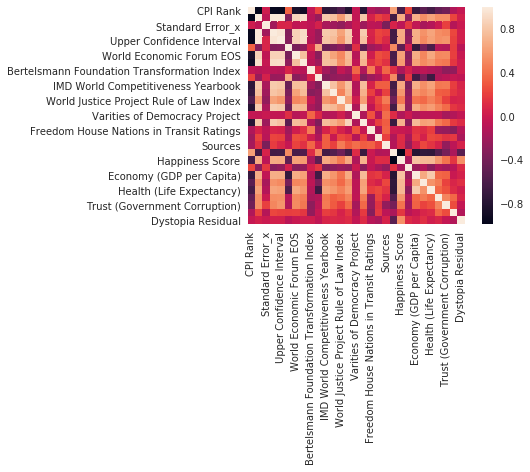

In [15]:
# let's sanitize the data little 

nan_cols = df.columns[df.isnull().all()].tolist()
print("Columns with all NaNs: \n{}".format(nan_cols))
df.drop(nan_cols, axis=1, inplace=True)
df.fillna(0, inplace=True)

corrmat = df.corr()
sns.heatmap(corrmat, square=True)

In [16]:

from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

X = df.drop(['Happiness Score','Country','Region_x','Region_y','Country Code','Happiness Rank','CPI Rank'],axis=1)
y = df['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [17]:
# how correlated are the explanatory variables to the dependent variable
predictions = lm.predict(X_test)
coef = pd.DataFrame(lm.coef_, X.columns)
coef.columns = ['Coefficients']
print(coef)

                                                    Coefficients
Corruption Perceptions Index (CPI)                  1.197041e-04
Standard Error_x                                    3.329771e-04
Lower Confidence Interval                           4.579962e-05
Upper Confidence Interval                          -1.538029e-04
World Bank CPIA                                    -1.830044e-06
World Economic Forum EOS                           -4.474851e-06
Global Insight Country Risk Ratings                -7.983770e-07
Bertelsmann Foundation Transformation Index         6.386936e-07
African Development Bank CPIA                      -2.169280e-06
IMD World Competitiveness Yearbook                 -1.457025e-06
Bertelsmann Foundation Sustainable Governance I...  2.040703e-07
World Justice Project Rule of Law Index            -1.810816e-06
PRS International Country Risk Guide               -2.921428e-06
Varities of Democracy Project                      -2.190888e-08
Economist Intelligence Un

In [18]:
mse = metrics.mean_squared_error(y_test, predictions)
variance = metrics.r2_score(y_test, predictions)
score = model.score(X_test, y_test)
print("\nMean Squared Error: {}\nVariance: {}\nScore: {}".format(mse, variance, score))


Mean Squared Error: 1.0058257903453923e-07
Variance: 0.9999999038826825
Score: 0.9999999038826825


Work in progress, will update and fix some errors when midterms are over.